In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic = pd.read_csv(url)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# in titanic dataset predict passenger is servied or not using the  following columns 
#use only pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked

In [6]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic['Cabin'] = titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [10]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [11]:
y=titanic['Survived']
x=titanic.drop(columns=['PassengerId','Survived','Name'],axis=1)

In [12]:
x.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

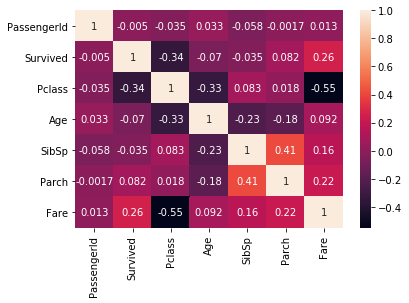

In [13]:
corr_matric = titanic.corr()
sns.heatmap(data=corr_matric,annot=True)  # we see the highly correlated features we can remove it one feature by seeing the heatmap

In [14]:
#cat=pd.Categorical(x['Sex'])
#cat.rename_categories([0,1],inplace=True)
x['Sex'] = x['Sex'].map({'female':1,'male':0}).astype(int)
x['Embarked'] = x['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [15]:
dummies= pd.get_dummies(x,columns=['Ticket','Cabin'],dtype=int)# here we cannot use the integer encoding due to multicolinearity 
dummies # one hot encoding is done for convert the categorical variable into integer 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_110152,Ticket_110413,Ticket_110465,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,3,0,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.000000,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,3,1,29.699118,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,0,26.000000,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x_train,x_test,y_train,y_test = train_test_split(dummies,y,test_size = 0.30, random_state= 400)

In [17]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
print(clf.score(x_train,y_train))
y_predict = clf.predict(x_test)
print(y_predict)

1.0
[0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0]


In [19]:
clf.score(x_test,y_test)

0.8582089552238806

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dummies)

In [21]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_scaled,y,test_size = 0.30, random_state= 400)

In [22]:
clf.fit(x_train1,y_train1)
print(clf.score(x_train1,y_train1))
y_predict1 = clf.predict(x_test1)
print(y_predict1)

1.0
[0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0]


In [23]:
clf.score(x_test1,y_test1)

0.8619402985074627

In [24]:
import pickle
#saving the model to the local file system
filename = "final_model_tree.pickle"
pickle.dump(clf, open(filename,'wb'))

In [25]:
sample=dummies.iloc[1:2]
load_model = pickle.load(open(filename,'rb'))
a=load_model.predict(scaler.transform(sample))
print(a)
if( a==1):
    print('person is servived')
else:
    print("person is not servived")

[1]
person is servived


In [ ]:
# thanks for giving this assignment